# Data scraping


In [1]:
# Importamos las herramientas necesarias para construir el scraper y obtener los datos que necesitamos

import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
# Ahora, indicamos que queremos obtener los títulos en inglés de las películas que scrapeamos, y no los originales

headers = {"Accept-Language": "en-US, en;q=0.5"}

### URL requests
- **url** es la variable a la que le asignamos la URL
- **results** es la variable donde vamos a guardar lo que obtengamos de requests.get
- **requests.get(url, headers=headers)** es el método que usamos para obtener el contenido de la URL
- **headers** le dice al scraper que devuelva los resultados en inglés, tal y como indicamos anteriormente

In [3]:
# Obtenemos el contenido de la pagina solicitando la URL

url= "https://www.imdb.com/search/title/?groups=top_1000&ref_=adv_prv"

results = requests.get(url, headers=headers)

### Usando BeautifulSoup

- **soup** es la variable que creamos para asignarle el método BeautifulSoup
- **print(soup.prettify())** imprimirá lo que obtengamos al scrapear y lo presentará en forma estructurada, fácil de leer

In [4]:
# Con BeautifulSoup hacemos el contenido que obtenemos fácil de leer

soup = BeautifulSoup(results.text, "html.parser")

print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb "Top 1000"
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "Loa

In [5]:
# Creamos listas vacías para poder almacenar los datos que obtengamos

titles =[]
years =[]
time = []
imdb_ratings = []
metascores = []
votes = []
us_gross = []


Buscamos, usando las herramientas para desarrolladores del browser, en qué lugar del código de la página web se encuentran almacenadas las películas.

En este caso, se encuentran dentro de una serie de **div**, con un atributo **class** que tiene dos valores **lister-item** y **mode-advanced**

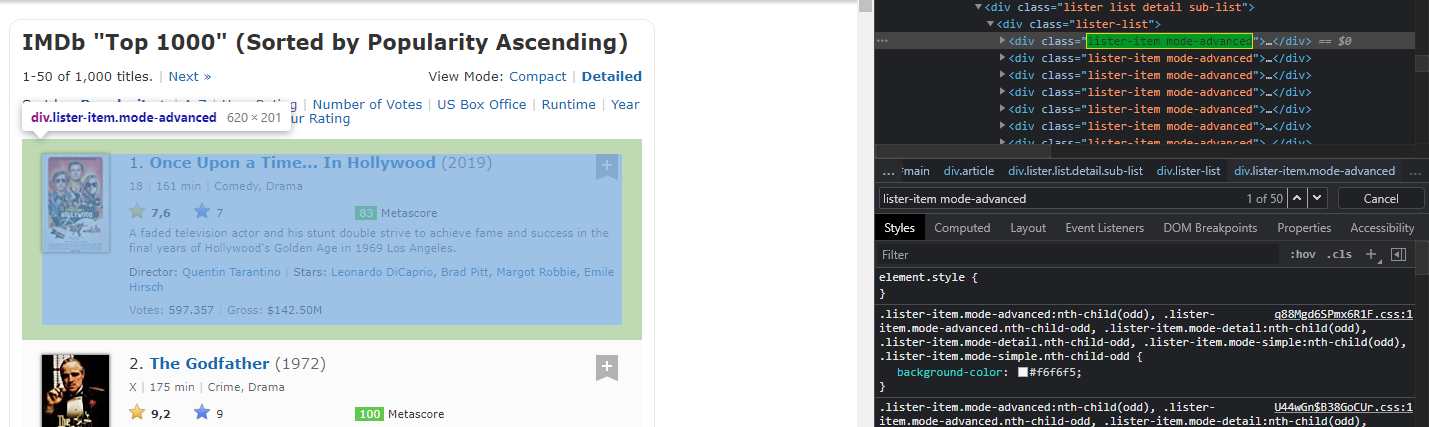

### Usando find_all

- **movie_div** es la variable que usaremos para almacenar todos los div containers con la clase **lister-item mode-advanced** 
- **find_all()** extrae todos los div containers que tienen la clase **lister-item mode-advanced** de lo que tenemos almacenado en la variable soup

In [6]:
# Le decimos a nuestro scraper que encuentre todos elementos lister-item mode-advanced

movie_div = soup.find_all('div', class_='lister-item mode-advanced')

### for container in movie_div:

- **for** se usa para que nuestro programa recorra toda la secuencia **lister-item mode-advanced** que hemos almacenado en **movie_div**
- **container** es el nombre de la variable que accede a cada div

In [7]:
# Iniciamos un for loop
# esto le dice al scraper que continue por todos los div que guardamos en movie_div

for container in movie_div:
    
    # Extraemos el título de la película
    name = container.h3.a.text
    titles.append(name)
    
    # Extraemos el año de la película
    year = container.h3.find('span', class_='lister-item-year').text
    years.append(year)
    
    #Extraemos la duración de la película
    runtime = container.p.find('span', class_='runtime').text if container.p.find('span', class_='runtime') else '-'
    time.append(runtime)
    
    # Extraemos las calificaciones de IMDb
    imdb = float(container.strong.text)
    imdb_ratings.append(imdb)
    
    # Extraemos el Metascore
    m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
    metascores.append(m_score)
    
    # Extraemos el número de votos y la recaudación
    nv = container.find_all('span', attrs={'name': 'nv'})
    
    # Filtramos el número de votos de nv
    vote = nv[0].text
    votes.append(vote)
   
    # Filtramos la recaudación de nv
    grosses= nv[1].text if len(nv) > 1 else '-'
    us_gross.append(grosses)
    
    

### name = container.h3.a.text
### titles.append(name)
    
- **name** es la variable que usamos para guardar el título
- **container** es lo que hemos usando en nuestro **for** loop
- **h3** y **.a** son los atributos que le dicen al scrapper que acceda a esos tags
- **text** le dice al scraper que coja el texto que haya dentro del tag <a>
- **titles.append(name)** le dice al scraper que coja lo que encuentre y lo almacene como nombre, rellenando nuestra lista de títulos vacía que creamos al principio
    

### year = container.h3.find('span', class_='lister-item-year').text
### years.append(year)

- **year** es la variable que usaremos para almacenar los años de datos que encontremos
- **container** es lo que hemos usando en nuestro **for** loop
- **h3** es un atributo y le decimos al scraper que acceda a él
- **find()** es un método que usamos para acceder el tag **<span>**
- **('span', class_='lister-item-year')** es el **<span>** que queremos
- **years.append(year)** le dice al scraper que coja lo que encontramos y almacenamos en **year** y lo añada en nuestra lista vacía llamada **years** que creamos al principio

### runtime = container.p.find('span', class_='runtime').text if container.p.find('span', class_='runtime') else ''
###    time.append(runtime)

- **runtime** es la variable que usaremos para guardar los datos de la duración de la película
- **container** es lo que hemos usado en nuestro **for** loop
- **find** es el método que usamos para acceder el tag **<span>**
- **('span', class_='runtime')** es el tag **<span>** que queremos
- **if container.p.find('span', class_='runtime') else '-'** dice que si hay datos, se cojan, pero sy no hay datos, se ponga un guion **-** en su lugar
- **text** le dice al scraper que coja el txto que haya en el **<span>**
- **time.append(runtime)** le dice al scraper que coja lo que encuentre y almacene en **runtime** y lo añada a nuestra lista vacía llamda **time** que creamos al principio

### imdb = float(container.strong.text)
### imdb_ratings.append(imdb)
 
- **imdb** es la variable que usaremos para almacenar las calificaciones
- **container** es lo que hemos usado en nuestro **for** loop
- **strong** es el atributo que le dice al scrapper que entre en ese tag
- **text** le dice al scraper que coja ese texto
- **float()** le dice al scraper que coja lo que haya encotrado y almacenado en **imdb** y lo añada a la lista vacía **imdb_ratings** que creamos al principio

### m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
### metascores.append(m_score)

- **m_score** es la variable en la que almacenaremos los datos de los Metascores
- **container** es lo que hemos usado en nuestro **for** loop
- **find** es un método que usaremos para acceder el tag 
- **('span', class_='metascore')** es el tag al que accederemos
- **text** le dice al scraper que coja ese xtexto
- **int()** convierte el texto que encontremos en un integer
- **metascores.append(m_score)** le dice al scraper que coja lo que haya encontrado y guardado en **m_score** y lo añada a nuestra lista vacía **metascores** que creamos al principio

### nv = container.find_all('span', attrs={'name': 'nv'})

- **nv** es una nueva variable que usaremos para almacenar los **<span>** tags de votos y de recaudación
- **container** es lo que hemos usado en nuestro **for** loop
- **find_all() es el método que usaremos para cojer los tags **<span>** 
- **('span', attrs={'name': 'nv})** es como cojeremos los atributos de ese tag específico
    
### vote = nv[0].text
### votes.append(vote)
    
- **vote** es la variable que usaremos para almacenar los votos que encontremos en el tag **nv**
- **nv[0]** le dice al scraper que vaya al tag **nv** y coja el primer dato en la lista (que son los votos porque los votos vienen primero en nuestro código HTML)
- **text** le dice al scraper que coja ese texto
- **votes.append(vote)** le dice al scraper ue coja lo que haya encontrado y almacenado en **vote** y lo añada a nuestra lista vacía llamada **votes** que creamos al principio
    
### grosses= nv[1].text if len(nv) > 1 else '-'
### us_gross.append(grosses)

- **grosses** es la variable que usaremos para almacenar la recaudación que encontremos en el tag **nv**
- **nv[1]** le dice al scraper que vaya al tag **nv** y coja el segundo dato en la lista (que es gross, porque viene segundo en nuestro código HTML)
- **nv[1].text if len(nv) > 1 else '-'** le dice al scraper que si la longitud de *nv* es mayor que 1, entonces encuentre el seguno dato que haya almacenado. Pero si el dato que hay almacenado en **nv** no es mayor que 1 (lo que significa que la recaudación no está), entonces que ponga un guión (**-**) en su lugar.
- **us_gross.append(grosses)** le dice al scraper que coja lo que haya encontrado y almacenado en **grosses** y lo añada a nuestra lista vacía que creamos al principio, **us_grosses**

In [8]:
# Ahora podemos ver qué tenemos

print(titles)
print(years)
print(time)
print(imdb_ratings)
print(metascores)
print(votes)
print(us_gross)

['Once Upon a Time... In Hollywood', 'Avengers: Endgame', 'The Godfather', "Zack Snyder's Justice League", 'The Shawshank Redemption', 'Avengers: Infinity War', 'Thor: Ragnarok', 'Jaws', "Harry Potter and the Sorcerer's Stone", 'Pulp Fiction', 'Little Women', 'Joker', 'The Father', 'Guardians of the Galaxy', 'The Game', 'Almost Famous', 'The Dark Knight', 'Parasite', 'Another Round', 'Boogie Nights', 'The Avengers', 'Knives Out', 'The Lord of the Rings: The Fellowship of the Ring', 'The Wolf of Wall Street', 'Interstellar', 'Inception', 'The Matrix', 'Titanic', 'Alien', 'American Psycho', 'Terminator 2: Judgment Day', 'Goodfellas', 'Inglourious Basterds', 'Tombstone', 'Mad Max: Fury Road', 'Soul', 'Star Trek', 'The Gentlemen', 'Fight Club', 'The Mitchells vs the Machines', 'The Godfather: Part II', 'Deadpool 2', 'The Big Lebowski', 'Captain America: Civil War', 'Bohemian Rhapsody', 'Hamilton', 'Iron Man', 'Gladiator', 'Avatar', 'Scarface']
['(2019)', '(2019)', '(1972)', '(2021)', '(199

In [9]:
# Ahora, construimos un DataFrame con pandas para almacenar los datos en una tabla

movies = pd.DataFrame({
    'movie': titles,
    'year': years,
    'timeMin': time,
    'imdb': imdb_ratings,
    'metascore': metascores,
    'votes': votes,
    'us_grossMillions': us_gross
})

# Creando el DataFrame

- **movies** es cómo llamaremos a nuestro DataFrame
- **pd.DataFrame** es como iniciamos la creación del DataFrame con pandas

In [10]:
# Y llamamos el DataFrame que acabamos de crear
movies

,movie,year,timeMin,imdb,metascore,votes,us_grossMillions
0,Once Upon a Time... In Hollywood,(2019),161 min,7.6,83,"604,797",$142.50M
1,Avengers: Endgame,(2019),181 min,8.4,78,"905,103",$858.37M
2,The Godfather,(1972),175 min,9.2,100,"1,676,832",$134.97M
3,Zack Snyder's Justice League,(2021),242 min,8.1,54,"315,317",-
4,The Shawshank Redemption,(1994),142 min,9.3,80,"2,423,959",$28.34M
5,Avengers: Infinity War,(2018),149 min,8.4,68,"898,214",$678.82M
6,Thor: Ragnarok,(2017),130 min,7.9,74,"629,037",$315.06M
7,Jaws,(1975),124 min,8.0,87,"556,566",$260.00M
8,Harry Potter and the Sorcerer's Stone,(2001),152 min,7.6,64,"685,795",$317.58M
9,Pulp Fiction,(1994),154 min,8.9,94,"1,880,628",$107.93M


In [11]:
# Vemos el tipo de datos que contiene el DataFrame que hemos creado
movies.dtypes

movie                object
year                 object
timeMin              object
imdb                float64
metascore            object
votes                object
us_grossMillions     object
dtype: object

In [12]:
# Vamos a eliminar los paréntesis del dato año (year) y convertirlo en un dato tipo integer

movies['year'] = movies['year'].str.extract('(\d+)').astype(int)

- **movies['year']** le dice a pandas que vaya a la columna **year** del DataFrame
- **str.extract('(\d+)')** el método **('(\d+)')** le dice a pandas que extraiga todos los digitos del strinig
- **.astype** convierte el resutado en un integer


In [13]:
# Ahora podmos ver que los años ya no van entre parentesis
movies['year']

0     2019
1     2019
2     1972
3     2021
4     1994
5     2018
6     2017
7     1975
8     2001
9     1994
10    2019
11    2019
12    2020
13    2014
14    1997
15    2000
16    2008
17    2019
18    2020
19    1997
20    2012
21    2019
22    2001
23    2013
24    2014
25    2010
26    1999
27    1997
28    1979
29    2000
30    1991
31    1990
32    2009
33    1993
34    2015
35    2020
36    2009
37    2019
38    1999
39    2021
40    1974
41    2018
42    1998
43    2016
44    2018
45    2020
46    2008
47    2000
48    2009
49    1983
Name: year, dtype: int32

In [14]:
# Y en el DataFrame, tampoco. Ahora luce mejor.
movies

,movie,year,timeMin,imdb,metascore,votes,us_grossMillions
0,Once Upon a Time... In Hollywood,2019,161 min,7.6,83,"604,797",$142.50M
1,Avengers: Endgame,2019,181 min,8.4,78,"905,103",$858.37M
2,The Godfather,1972,175 min,9.2,100,"1,676,832",$134.97M
3,Zack Snyder's Justice League,2021,242 min,8.1,54,"315,317",-
4,The Shawshank Redemption,1994,142 min,9.3,80,"2,423,959",$28.34M
5,Avengers: Infinity War,2018,149 min,8.4,68,"898,214",$678.82M
6,Thor: Ragnarok,2017,130 min,7.9,74,"629,037",$315.06M
7,Jaws,1975,124 min,8.0,87,"556,566",$260.00M
8,Harry Potter and the Sorcerer's Stone,2001,152 min,7.6,64,"685,795",$317.58M
9,Pulp Fiction,1994,154 min,8.9,94,"1,880,628",$107.93M


In [15]:
# Ahora convertimos los datos de timeMin en integer

movies['timeMin'] = movies['timeMin'].str.extract('(\d+)').astype(int)

In [16]:
# Y de nuevo, convertimos los datos de metascore en integer

movies['metascore'] = movies['metascore'].astype(int)

In [17]:
# Con los votos, tenemos que eliminar las comas y convertir el tipo de dato en integer

movies['votes'] = movies['votes'].str.replace(',', '').astype(int)


- **movies['votes']** son los datos de los votos en nuestro DataFrame. Le estamos asignando los nuevos valores "limpios".
- **.str.replace(',', '')** coje el str y usa el método **replace** para reemplazar las comas con un espacio vacío ('')
- **.astype(int)** convierte el resultado en un integer


In [18]:
# Ahora limpiamos los datos de las recaudaciones. Eliminaremos el símbolo del dolar ($) y las Ms
# y convertiremos el tipo de dato de object a floating-point

movies['us_grossMillions'] = movies['us_grossMillions'].map(lambda x: x.lstrip('$').rstrip('M'))

movies['us_grossMillions'] = pd.to_numeric(movies['us_grossMillions'], errors='coerce')



**movies['us_grossMillions'] = movies['us_grossMillions'].map(lambda x: x.lstrip('$').rstrip('M'))**

- **movies['us_grossMillions']** son los datos de recaudación en nuestro DataFrame. Le estamos asignando los nuevos valores limpios.
- **movies['us_grossMillions']** le dice a pandas que vaya a la columna **us_grossMillions** en nuestro DataFrame
- La función **.map()** llama a la función concreta para cada elemento de la iteración
- **lambda x: x** es una función anónima de Python
- **lstrip(‘$’).rstrip(‘M’)** son los argumentos de nuestra función. Le dice a la función que elimine el símbolo **$** del lado izquierdo y la **M** del lado derecho



**movies['us_grossMillions'] = pd.to_numeric(movies['us_grossMillions'], errors='coerce')**

- **movies['us_grossMillions']** está ahora limpio de los elementos que no necesitabamos ($ y M), lo que queda es hacer el cambio de tipo de dato
- **pd.to_numeric** es un método con el que podemos cambiar la columna a float.
- **errors='coerce'** transformará los valores no numéricos **(-)** en **NaN (not-a-number)**, porque tenemos guiones en los lugares donde no hay datos.


In [19]:
# Comprobamos que los cambios en el DataFrame se han efectuado con éxito
movies

,movie,year,timeMin,imdb,metascore,votes,us_grossMillions
0,Once Upon a Time... In Hollywood,2019,161,7.6,83,604797,142.50
1,Avengers: Endgame,2019,181,8.4,78,905103,858.37
2,The Godfather,1972,175,9.2,100,1676832,134.97
3,Zack Snyder's Justice League,2021,242,8.1,54,315317,NaN
4,The Shawshank Redemption,1994,142,9.3,80,2423959,28.34
5,Avengers: Infinity War,2018,149,8.4,68,898214,678.82
6,Thor: Ragnarok,2017,130,7.9,74,629037,315.06
7,Jaws,1975,124,8.0,87,556566,260.00
8,Harry Potter and the Sorcerer's Stone,2001,152,7.6,64,685795,317.58
9,Pulp Fiction,1994,154,8.9,94,1880628,107.93


In [20]:
# Comprobamos que los cambios en los datatypes se han efectuado con éxito
movies.dtypes

movie                object
year                  int32
timeMin               int32
imdb                float64
metascore             int32
votes                 int32
us_grossMillions    float64
dtype: object

In [21]:
# Ahora, guardamos los datos en un documento CSV

movies.to_csv('movies.csv')

In [22]:
movies

,movie,year,timeMin,imdb,metascore,votes,us_grossMillions
0,Once Upon a Time... In Hollywood,2019,161,7.6,83,604797,142.50
1,Avengers: Endgame,2019,181,8.4,78,905103,858.37
2,The Godfather,1972,175,9.2,100,1676832,134.97
3,Zack Snyder's Justice League,2021,242,8.1,54,315317,NaN
4,The Shawshank Redemption,1994,142,9.3,80,2423959,28.34
5,Avengers: Infinity War,2018,149,8.4,68,898214,678.82
6,Thor: Ragnarok,2017,130,7.9,74,629037,315.06
7,Jaws,1975,124,8.0,87,556566,260.00
8,Harry Potter and the Sorcerer's Stone,2001,152,7.6,64,685795,317.58
9,Pulp Fiction,1994,154,8.9,94,1880628,107.93


# Manejando los datos

In [23]:
# Vemos el número de filas y de columnas del dataframe
movies.shape

(50, 7)

In [24]:
movies.columns

Index(['movie', 'year', 'timeMin', 'imdb', 'metascore', 'votes',
       'us_grossMillions'],
      dtype='object')

In [25]:
# Ahora nos fijamos en tres columnas en concreto: movie, metascore y us_grossMillions. 

movies[['movie', 'metascore', 'us_grossMillions']]

,movie,metascore,us_grossMillions
0,Once Upon a Time... In Hollywood,83,142.50
1,Avengers: Endgame,78,858.37
2,The Godfather,100,134.97
3,Zack Snyder's Justice League,54,NaN
4,The Shawshank Redemption,80,28.34
5,Avengers: Infinity War,68,678.82
6,Thor: Ragnarok,74,315.06
7,Jaws,87,260.00
8,Harry Potter and the Sorcerer's Stone,64,317.58
9,Pulp Fiction,94,107.93


In [26]:
# Antes de nada, vamos a cambiar el nombre de la columna us_grossMillions a gross

movies.rename(columns = {'us_grossMillions' : 'gross'})



,movie,year,timeMin,imdb,metascore,votes,gross
0,Once Upon a Time... In Hollywood,2019,161,7.6,83,604797,142.50
1,Avengers: Endgame,2019,181,8.4,78,905103,858.37
2,The Godfather,1972,175,9.2,100,1676832,134.97
3,Zack Snyder's Justice League,2021,242,8.1,54,315317,NaN
4,The Shawshank Redemption,1994,142,9.3,80,2423959,28.34
5,Avengers: Infinity War,2018,149,8.4,68,898214,678.82
6,Thor: Ragnarok,2017,130,7.9,74,629037,315.06
7,Jaws,1975,124,8.0,87,556566,260.00
8,Harry Potter and the Sorcerer's Stone,2001,152,7.6,64,685795,317.58
9,Pulp Fiction,1994,154,8.9,94,1880628,107.93


In [27]:
# Tras comprobar que está correcto, aplicamos inplace=True para que el cambio sea efectivo

movies.rename(columns = {'us_grossMillions' : 'gross'}, inplace=True)


In [28]:
# Comprobamos que efectivamente, el cambio se ha producido
movies['gross']

0     142.50
1     858.37
2     134.97
3        NaN
4      28.34
5     678.82
6     315.06
7     260.00
8     317.58
9     107.93
10    108.10
11    335.45
12       NaN
13    333.18
14     48.32
15     32.53
16    534.86
17     53.37
18       NaN
19     26.40
20    623.28
21    165.36
22    315.54
23    116.90
24    188.02
25    292.58
26    171.48
27    659.33
28     78.90
29     15.07
30    204.84
31     46.84
32    120.54
33     56.51
34    154.06
35       NaN
36    257.73
37       NaN
38     37.03
39       NaN
40     57.30
41    324.59
42     17.50
43    408.08
44    216.43
45       NaN
46    318.41
47    187.71
48    760.51
49     45.60
Name: gross, dtype: float64

In [29]:
# Vamos a ver qué películas recaudaron más de 500 milones, creando un filtro al que llamaremos over_500

over_500 = (movies['gross'] > 500 )

In [30]:
# Y ahora localizamos las película que han recaudado más de 500 millones 
movies.loc[over_500]

,movie,year,timeMin,imdb,metascore,votes,gross
1,Avengers: Endgame,2019,181,8.4,78,905103,858.37
5,Avengers: Infinity War,2018,149,8.4,68,898214,678.82
16,The Dark Knight,2008,152,9.0,84,2380639,534.86
20,The Avengers,2012,143,8.0,69,1292791,623.28
27,Titanic,1997,194,7.8,75,1079892,659.33
48,Avatar,2009,162,7.8,83,1144486,760.51


In [31]:
# ¿Y qué pasa con las pelis mejor calificadas? 
# Creamos un filtro para ver las  películas que tienen de 80 a 100 puntos en metacritic

best_review = (movies['metascore'] > 80)

In [32]:
# Aplicamos el filtro que hemos creado al dataframe movies
movies.loc[best_review]

,movie,year,timeMin,imdb,metascore,votes,gross
0,Once Upon a Time... In Hollywood,2019,161,7.6,83,604797,142.50
2,The Godfather,1972,175,9.2,100,1676832,134.97
7,Jaws,1975,124,8.0,87,556566,260.00
9,Pulp Fiction,1994,154,8.9,94,1880628,107.93
10,Little Women,2019,135,7.8,91,158893,108.10
12,The Father,2020,97,8.3,88,80516,NaN
15,Almost Famous,2000,122,7.9,90,260826,32.53
16,The Dark Knight,2008,152,9.0,84,2380639,534.86
17,Parasite,2019,132,8.6,96,632340,53.37
19,Boogie Nights,1997,155,7.9,85,246402,26.40


In [33]:
# Y aquí ordenamos el dataframe de mayor a menor puntuación en imdb
movies.sort_values(by='imdb', ascending=False)

,movie,year,timeMin,imdb,metascore,votes,gross
4,The Shawshank Redemption,1994,142,9.3,80,2423959,28.34
2,The Godfather,1972,175,9.2,100,1676832,134.97
16,The Dark Knight,2008,152,9.0,84,2380639,534.86
40,The Godfather: Part II,1974,202,9.0,90,1164145,57.30
9,Pulp Fiction,1994,154,8.9,94,1880628,107.93
25,Inception,2010,148,8.8,74,2136779,292.58
38,Fight Club,1999,139,8.8,66,1911628,37.03
22,The Lord of the Rings: The Fellowship of the Ring,2001,178,8.8,92,1707773,315.54
31,Goodfellas,1990,146,8.7,90,1053106,46.84
26,The Matrix,1999,136,8.7,73,1726962,171.48


In [34]:
# ¿Cuáles son las 10 películas con más votos del dataframe?

movies.nlargest(10, 'votes')

,movie,year,timeMin,imdb,metascore,votes,gross
4,The Shawshank Redemption,1994,142,9.3,80,2423959,28.34
16,The Dark Knight,2008,152,9.0,84,2380639,534.86
25,Inception,2010,148,8.8,74,2136779,292.58
38,Fight Club,1999,139,8.8,66,1911628,37.03
9,Pulp Fiction,1994,154,8.9,94,1880628,107.93
26,The Matrix,1999,136,8.7,73,1726962,171.48
22,The Lord of the Rings: The Fellowship of the Ring,2001,178,8.8,92,1707773,315.54
2,The Godfather,1972,175,9.2,100,1676832,134.97
24,Interstellar,2014,169,8.6,74,1582487,188.02
47,Gladiator,2000,155,8.5,67,1379744,187.71


In [35]:
# ¿Y las películas con menos votos?

movies.nsmallest(10, 'votes')

,movie,year,timeMin,imdb,metascore,votes,gross
39,The Mitchells vs the Machines,2021,113,7.7,80,67570,NaN
45,Hamilton,2020,160,8.4,90,68977,NaN
12,The Father,2020,97,8.3,88,80516,NaN
18,Another Round,2020,117,7.8,79,93081,NaN
33,Tombstone,1993,130,7.8,50,132336,56.51
10,Little Women,2019,135,7.8,91,158893,108.10
19,Boogie Nights,1997,155,7.9,85,246402,26.40
15,Almost Famous,2000,122,7.9,90,260826,32.53
35,Soul,2020,100,8.1,83,263734,NaN
37,The Gentlemen,2019,113,7.8,51,272267,NaN


In [36]:
# ¿Cuál es la calificación media en imdb?
    
movies['imdb'].median()

8.1

In [37]:
# ¿Y la calificación media en metacritic (metascore)?

movies['metascore'].median()


77.0

In [38]:
# Y así podemos verlas ambias a la vez
movies[['imdb', 'metascore']].median()

imdb          8.1
metascore    77.0
dtype: float64

In [39]:
movies[['imdb', 'metascore']].mean()

imdb          8.216
metascore    76.580
dtype: float64

### Diferencias entre media y mediana

La **media** aritmética o promedio representa el reparto equitativo, el equilibrio, la equidad. Es el valor que tendrían los datos, si todos ellos fueran iguales. O, también, el valor que correspondería a cada uno de los datos de la distribución si su suma total se repartiera por igual.

Si se ordenan todos los datos, de menor a mayor, la **mediana** es el valor que ocupa la posición central. Si el número de datos es par, la mediana es la media aritmética de los dos centrales.

__Fuente: http://geogebra.es/cvg_primaria/05/html/mediana.html__

In [40]:
# Para obtener datos estadísticos de nuestro dataframe
movies.describe()

,year,timeMin,imdb,metascore,votes,gross
count,50.000000,50.00000,50.000000,50.000000,5.000000e+01,43.000000
mean,2005.940000,143.16000,8.216000,76.580000,8.990118e+05,236.184186
std,13.787616,27.87901,0.450107,12.393366,6.176085e+05,215.982830
min,1972.000000,97.00000,7.600000,49.000000,6.757000e+04,15.070000
25%,1997.250000,122.50000,7.825000,68.250000,4.838645e+05,56.905000
50%,2009.000000,138.00000,8.100000,77.000000,7.888080e+05,171.480000
75%,2018.750000,155.00000,8.500000,86.500000,1.221158e+06,317.995000
max,2021.000000,242.00000,9.300000,100.000000,2.423959e+06,858.370000


In [41]:
# Count cuenta las filas que tienen datos.
# En nuestro dataframe, en la columna gross (recaudación) hay 7 filas sin datos
movies['gross'].count()

43

In [42]:
# Con value_counts() contamos cuantos registros de un determinado valor hay en una columna

movies['year'].value_counts()

2019    7
2020    4
1997    3
2009    3
2000    3
2018    3
2008    2
2014    2
2021    2
2001    2
1999    2
1994    2
1974    1
1972    1
1975    1
1979    1
1990    1
2013    1
2017    1
2016    1
2015    1
1991    1
2012    1
2010    1
1998    1
1993    1
1983    1
Name: year, dtype: int64

In [43]:
# Podemos agrupar resultados con groupby
# Creamos un filtro moviea_year al que asignamos el groupby, que se hace sobre la columna year
movies_year = movies.groupby(['year'])

In [44]:
# Y ahora aplicamos el filtro sobre movies_year usando get_group e indicando el año que queremos obtener
movies_year.get_group(2017)

,movie,year,timeMin,imdb,metascore,votes,gross
6,Thor: Ragnarok,2017,130,7.9,74,629037,315.06


In [45]:
# Podemos crear un filtro que nos devuelve solo las películas de un año concreto

filter_2020 = movies['year'] == 2020

# Y aplicamos el filtro. Con .loc, localizamos las películas que coincidan con nuestro filtro
movies.loc[filter_2020]

,movie,year,timeMin,imdb,metascore,votes,gross
12,The Father,2020,97,8.3,88,80516,NaN
18,Another Round,2020,117,7.8,79,93081,NaN
35,Soul,2020,100,8.1,83,263734,NaN
45,Hamilton,2020,160,8.4,90,68977,NaN


In [46]:
# Otro uso de un filtro y loc... Películas con una calificación imdb igual o mayor que 7
score_filter = movies['imdb'] >= 7

# Y aplicando value_counts a la columna que queremos, podemos ver el número de películas que tienen la misma nota
movies.loc[score_filter]['imdb'].value_counts()

7.8    8
7.9    7
8.4    5
8.1    4
8.0    3
7.6    3
8.3    3
8.8    3
8.6    2
8.5    2
8.7    2
7.7    2
9.0    2
9.2    1
8.9    1
8.2    1
9.3    1
Name: imdb, dtype: int64